In [39]:
import oda_api.token 
import logging
import numpy as np
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage, OdaLightCurve, OdaSpectrum
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.patches import Circle
from astropy.time import Time

In [2]:
# token = ''
# token = getpass.getpass('Insert the token')
token = oda_api.token.discover_token() # get token stored locally

In [3]:
logging.getLogger().setLevel(logging.INFO) # WARNING, INFO or DEBUG
logging.getLogger('oda_api').addHandler(logging.StreamHandler())

Import the ScWs from the saved file.

In [4]:
scw_ids = []
scw_versions = []
scw_start_times = []
scw_end_times = []
jupiter_ra = []
jupiter_dec = []

with open("2004-01-01_2024-01-01.txt", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split(", ")
        scw_ids.append(parts[0])
        scw_versions.append(parts[1])
        scw_start_times.append(float(parts[2]))  
        scw_end_times.append(float(parts[3]))  
        jupiter_ra.append(float(parts[4]))  
        jupiter_dec.append(float(parts[5]))  


Add IDs and versions together to make correctly formatted ScWs, and compute durations of the ScW observations.

In [52]:
scw_list = [id + "." + ver for id, ver in zip(scw_ids, scw_versions)]
scw_durations = [(end - start)*24*60 for start, end in zip(scw_start_times, scw_end_times)]
print(scw_list)
print(scw_durations)
print([Time(start, format='mjd').isot for start in scw_start_times])

['026601100010.001', '026601110010.001', '026700000210.001', '026700000230.001', '043200640010.001', '043200650010.001', '091700010010.001', '091700020010.001', '106300180010.001', '106300190010.001', '112600220010.001', '112600230010.001', '124200010010.001', '124200020010.001', '169500010010.001', '169500020010.001', '230200070010.001', '230200080010.001', '230200090010.001', '230200160010.001', '230200170010.001', '230200180010.001', '230200470010.001', '230200480010.001', '230200490010.001', '230200550010.001', '230200560010.001', '230200570010.001', '230200570020.001', '236600410010.001', '236600420010.001', '236600440010.001', '236600450010.001', '236600460010.001', '236600470010.001', '236600480010.001', '236600490010.001', '236600500010.001', '236600510010.001', '236600520010.001', '236600530010.001', '236600540010.001', '236600550010.001', '236600560010.001', '236600570010.001', '236600580010.001', '236600590010.001', '236600600010.001', '236600610010.001', '236600620010.001',

Query the ODA API.

In [53]:
disp = DispatcherAPI(url="https://www.astro.unige.ch/mmoda/dispatch-data", instrument="mock")

list_position = 3

par_dict = {
"E1_keV": "15",
"E2_keV": "30",
"T_format": "isot",
"detection_threshold": "5", # for images
# "time_bin": "70", # for light curves
"instrument": "isgri",
"osa_version": "OSA10.2",
"product": "isgri_image", # isgri_image or isgri_lc or isgri_spectrum
"product_type": "Real",
"scw_list": [scw_list[list_position]],
'token': token
}

data_collection = disp.get_product(**par_dict)
data_collection.show()

found token in TokenLocation.FILE_CUR_DIR your token payload: {
    "email": "hucklethums@icloud.com",
    "exp": 1741779981,
    "name": "interstellxr",
    "roles": "authenticated user, public-pool-hpc",
    "sub": "hucklethums@icloud.com"
}
token expires in 213.4 h
discovered token in environment
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2025-03-03 15:22:42), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: P40QMVZJGFJDDYOP job: db0c1e777e78123e

... query status prepared => done
... assigned job id: db0c1e777e78123e
query COMPLETED SUCCESSFULLY (state done)
query complete: terminating


ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': None}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



SPECTRUM

In [ ]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *

In [ ]:
ogip_data = OGIPLike('ogip',
                     observation='prod_0_4U1700m377_isgri_spectrum.fits',
                     arf_file= 'prod_1_4U1700m377_isgri_arf.fits' ,
                     response= 'prod_2_4U1700m377_isgri_rmf.fits')
ogip_data.view_count_spectrum()

LIGHTCURVE

In [49]:
for ID,s in enumerate(data_collection._p_list):
    print (ID,s.meta_data['src_name'])

In [ ]:
data_collection.isgri_lc_2_GX349p2.show()
lc=data_collection._p_list[0]
lc.show()

In [ ]:
OdaLightCurve(lc).show(unit_ID=1)

IMAGE

In [54]:
data_collection.mosaic_image_0_mosaic.show()
print(data_collection.mosaic_image_0_mosaic.show_meta())

------------------------------
name: mosaic_image
meta_data dict_keys(['product', 'instrument', 'src_name', 'query_parameters'])
number of data units 6
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-MOSA-IMA
data uniti 3 ,name: ISGR-MOSA-IMA
data uniti 4 ,name: ISGR-MOSA-IMA
data uniti 5 ,name: ISGR-MOSA-IMA
------------------------------
product : mosaic
instrument : isgri
src_name : 
query_parameters : None
------------------------------
None


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53359.426435 from DATE-OBS.
Set MJD-END to 53359.449363 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


'./026700000230.001mosaic.fits'

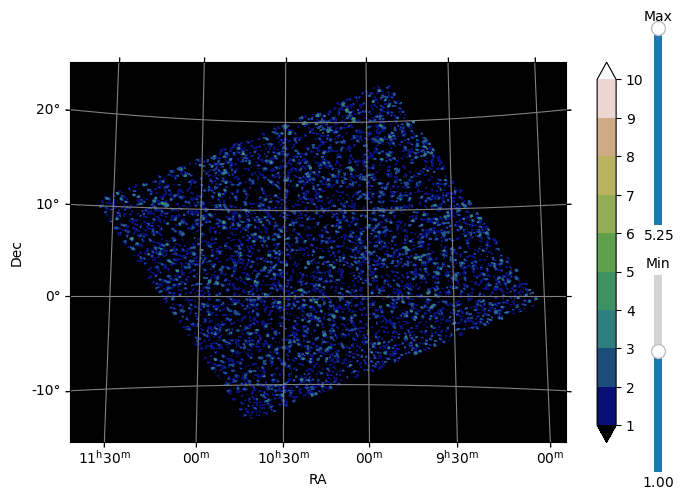

In [55]:
im=OdaImage(data_collection)
_ = im.show()
im.write_fits(f"{scw_ids[list_position]}"+f".{scw_versions[list_position]}")

Filename: 026700000230.001mosaic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  GROUPING      1 BinTableHDU     82   4R x 16C   [8A, 32A, 1J, 1J, 256A, 3A, 32A, 1I, 1I, 1E, 1E, 1E, 1D, 1D, 1D, 1D]   
  2  ISGR-MOSA-IMA    1 ImageHDU        67   (543, 543)   float32   
  3  ISGR-MOSA-IMA    2 ImageHDU        67   (543, 543)   float32   
  4  ISGR-MOSA-IMA    3 ImageHDU        67   (543, 543)   float32   
  5  ISGR-MOSA-IMA    4 ImageHDU        67   (543, 543)   float32   


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  543                                                  
NAXIS2  =                  543                                                  
PCOUNT  =                    0 / number o

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53359.426435 from DATE-OBS.
Set MJD-END to 53359.449363 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_38274/456720164.py:22: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')
/tmp/ipykernel_38274/456720164.py:22: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')
/tmp/ipykernel_38274/456720164.py:27: RuntimeWarning: cdelt will be ignored since cd is present
  pixel_scale = np.abs(wcs.wcs.cdelt[0]) * 3600  # pixel size in arcseconds


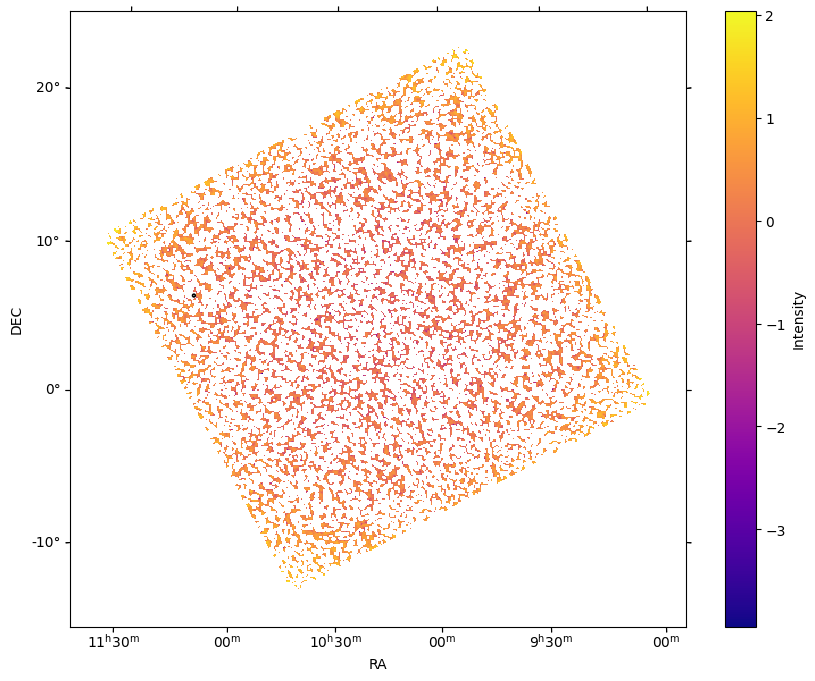

In [57]:
from astropy.wcs import WCS
from matplotlib.patches import Circle

fits_file = f"{scw_list[list_position]}"+"mosaic.fits"

# Jupiter
ra_deg = jupiter_ra[list_position]
dec_deg = jupiter_dec[list_position]

with fits.open(fits_file) as hdul:
    hdul.info()
    image_data = hdul[2].data 
    print("\n")
    print(repr(hdul[2].header))
    print("\n")
    wcs = WCS(hdul[2].header)  

x, y = wcs.all_world2pix(ra_deg, dec_deg, 1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')

pixel_scale = np.abs(wcs.wcs.cdelt[0]) * 3600  # pixel size in arcseconds
circle_radius_pixels = 100 * 50 / pixel_scale / 2  # radius in pixels (100 times Jupiter's apparent size)

circle = Circle((x, y), circle_radius_pixels, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(circle)

plt.colorbar(im, label="Intensity")
plt.show()